<a href="https://colab.research.google.com/github/MYoussef885/House_Price_Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Importing the Boston House Price Dataset

In [3]:
house_price_dataset = sklearn.datasets.fetch_california_housing()

In [4]:
print(house_price_dataset)

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]]), 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]), 'frame': None, 'target_names': ['MedHouseVal'], 'feature_names': ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude'], 'DESCR': '.. _california_housing_dataset:\n\nCalifornia Housing dataset\n-

In [5]:
# Loading the dataset to a pandas dataframe
house_price_dataframe = pd.DataFrame(house_price_dataset.data, columns = house_price_dataset.feature_names)


In [6]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [7]:
# add the target column to the dataframe
house_price_dataframe['price'] = house_price_dataset.target

In [8]:
house_price_dataframe.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
# checking the number of rows and columns in the dataframe
house_price_dataframe.shape

(20640, 9)

In [10]:
# check for missing values
house_price_dataframe.isnull().sum

<bound method DataFrame.sum of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0       False     False     False      False       False     False     False   
1       False     False     False      False       False     False     False   
2       False     False     False      False       False     False     False   
3       False     False     False      False       False     False     False   
4       False     False     False      False       False     False     False   
...       ...       ...       ...        ...         ...       ...       ...   
20635   False     False     False      False       False     False     False   
20636   False     False     False      False       False     False     False   
20637   False     False     False      False       False     False     False   
20638   False     False     False      False       False     False     False   
20639   False     False     False      False       False     False     False   

       L

In [11]:
# statistical measures of the dataset
house_price_dataframe.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Understanding the **correlation** between various features in the dataset

1. Positive Correlation
2. Negative Correlation

In [14]:
correlation = house_price_dataframe.corr()

<Axes: >

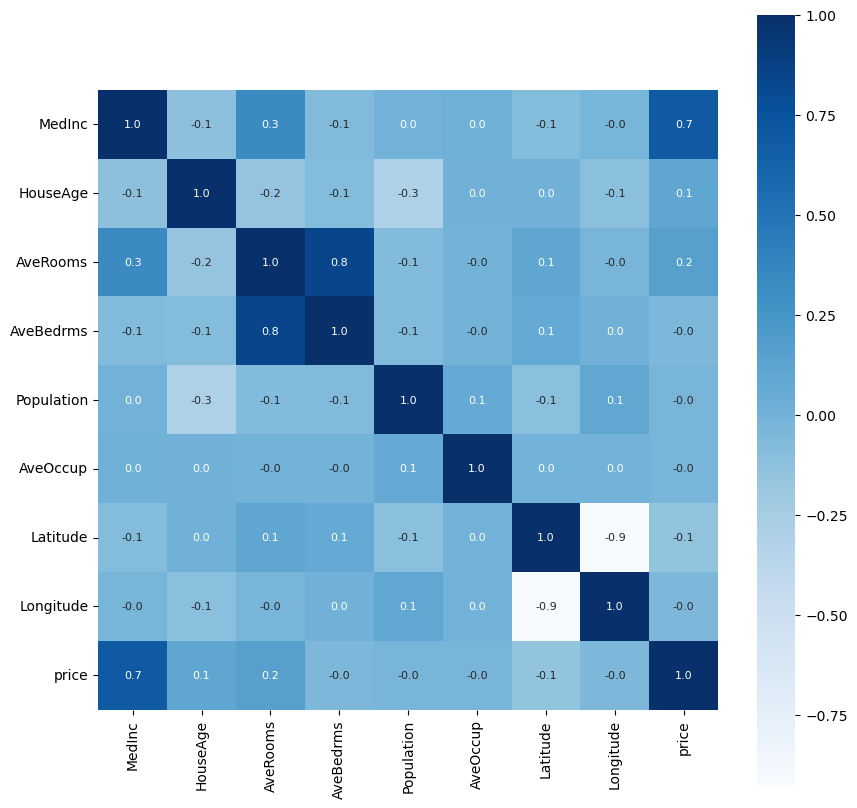

In [15]:
# constructing a heatmap to understand the correlation

plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

Splitting the data and target

In [17]:
X = house_price_dataframe.drop(['price'], axis=1)
Y = house_price_dataframe['price']

In [18]:
print(X,Y)

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   

       Longitude  
0        -122.23  
1

Splitting the data into training data and test data

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(20640, 8) (16512, 8) (4128, 8)


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# use X_scaled in train-test split
X_train_scaled, X_test_scaled, Y_train, Y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=2)


Model Training

XGBoost Regressor

In [36]:
# load the model
model = XGBRegressor()

In [37]:
#training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

Evaluation

Prediction on training data

In [40]:
# accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [41]:
print(training_data_prediction)

[0.5523039 3.0850039 0.5835302 ... 1.9204227 1.952873  0.6768683]


In [42]:
# R Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.943650140819218
Mean Absolute Error: 0.1933648700612105



Visualize the actuale prices and predicted prices

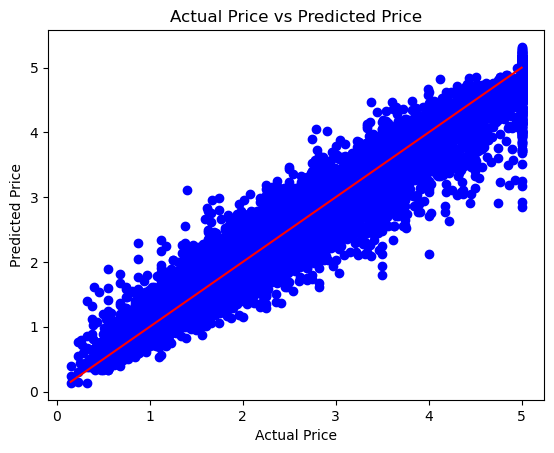

In [44]:
plt.scatter(Y_train, training_data_prediction, color='blue')
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()


Prediction on test data

In [46]:
# accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [48]:
# R Squared Error
score_1 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.8338000331788725
Mean Absolute Error: 0.3108631800268186


[0.58807542 3.17425069 0.96796179 ... 1.53687806 1.78476947 1.21883569]
Linear Regression - R Squared Error (Train): 0.6068205998456939
Linear Regression - Mean Absolute Error (Train): 0.5303857028686887


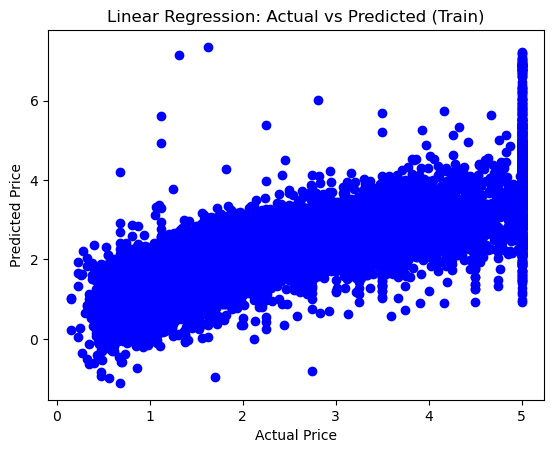

Linear Regression - R Squared Error (Test): 0.6013853272055154
Linear Regression - Mean Absolute Error (Test): 0.535829254965776


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Load the model
model = LinearRegression()

# Train the model
model.fit(X_train, Y_train)

# Prediction on training data
training_data_prediction = model.predict(X_train)
print(training_data_prediction)

# Accuracy metrics on training data
score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('Linear Regression - R Squared Error (Train):', score_1)
print('Linear Regression - Mean Absolute Error (Train):', score_2)

# Plot
plt.scatter(Y_train, training_data_prediction, color='blue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Linear Regression: Actual vs Predicted (Train)")
plt.show()

# Prediction on test data
test_data_prediction = model.predict(X_test)

# Accuracy metrics on test data
score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('Linear Regression - R Squared Error (Test):', score_1)
print('Linear Regression - Mean Absolute Error (Test):', score_2)


[0.58805688 3.17407411 0.96803197 ... 1.53691399 1.7845678  1.21889344]
Ridge Regression - R Squared Error (Train): 0.6068205620733178
Ridge Regression - Mean Absolute Error (Train): 0.5303941560864034


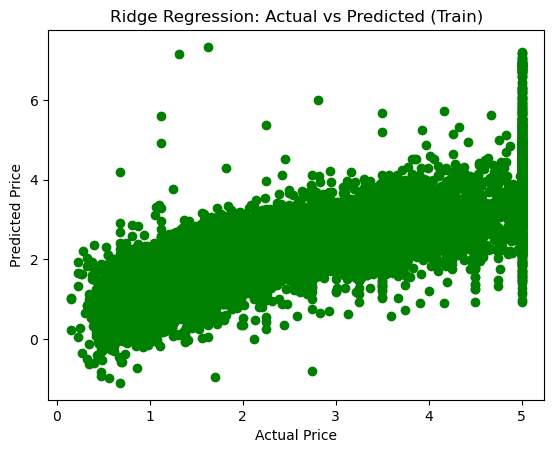

Ridge Regression - R Squared Error (Test): 0.6013790960754167
Ridge Regression - Mean Absolute Error (Test): 0.5358410021212302


In [57]:
from sklearn.linear_model import Ridge

model = Ridge()
model.fit(X_train, Y_train)

training_data_prediction = model.predict(X_train)
print(training_data_prediction)

score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('Ridge Regression - R Squared Error (Train):', score_1)
print('Ridge Regression - Mean Absolute Error (Train):', score_2)

plt.scatter(Y_train, training_data_prediction, color='green')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Ridge Regression: Actual vs Predicted (Train)")
plt.show()

test_data_prediction = model.predict(X_test)

score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('Ridge Regression - R Squared Error (Test):', score_1)
print('Ridge Regression - Mean Absolute Error (Test):', score_2)


[0.79798   2.9101602 0.59217   ... 1.93037   1.66486   0.82185  ]
Random Forest - R Squared Error (Train): 0.9735661951156014
Random Forest - Mean Absolute Error (Train): 0.12097837802204495


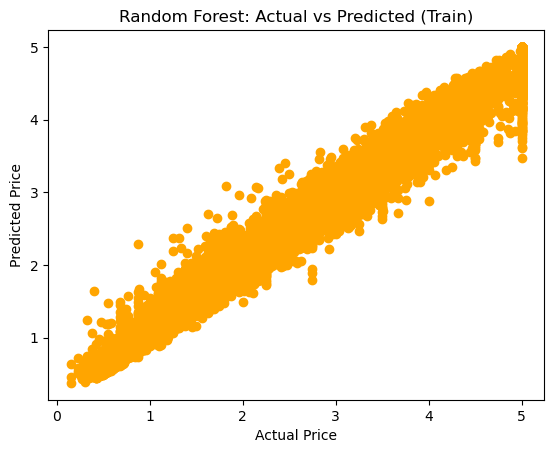

Random Forest - R Squared Error (Test): 0.8063470874572873
Random Forest - Mean Absolute Error (Test): 0.3313420458333335


In [63]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, Y_train)

training_data_prediction = model.predict(X_train)
print(training_data_prediction)

score_1 = metrics.r2_score(Y_train, training_data_prediction)
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print('Random Forest - R Squared Error (Train):', score_1)
print('Random Forest - Mean Absolute Error (Train):', score_2)

plt.scatter(Y_train, training_data_prediction, color='orange')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Actual vs Predicted (Train)")
plt.show()

test_data_prediction = model.predict(X_test)

score_1 = metrics.r2_score(Y_test, test_data_prediction)
score_2 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print('Random Forest - R Squared Error (Test):', score_1)
print('Random Forest - Mean Absolute Error (Test):', score_2)


In [67]:
from sklearn.metrics import mean_absolute_percentage_error

mape_train = mean_absolute_percentage_error(Y_train, training_data_prediction)
mape_test = mean_absolute_percentage_error(Y_test, test_data_prediction)

print("Training Accuracy (approx):", 100 - mape_train * 100, "%")
print("Testing Accuracy (approx):", 100 - mape_test * 100, "%")


Training Accuracy (approx): 93.2637742907619 %
Testing Accuracy (approx): 81.25921188238564 %


In [68]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error


In [70]:
def evaluate_model(model, X_train, Y_train, X_test, Y_test, model_name="Model"):
    model.fit(X_train, Y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    r2_train = r2_score(Y_train, train_pred)
    mae_train = mean_absolute_error(Y_train, train_pred)
    acc_train = 100 - mean_absolute_percentage_error(Y_train, train_pred) * 100

    r2_test = r2_score(Y_test, test_pred)
    mae_test = mean_absolute_error(Y_test, test_pred)
    acc_test = 100 - mean_absolute_percentage_error(Y_test, test_pred) * 100

    print(f"\n📊 {model_name} Evaluation:")
    print(f"Train R² Score: {r2_train:.4f}")
    print(f"Train MAE: {mae_train:.2f}")
    print(f"Train Accuracy (approx): {acc_train:.2f}%")

    print(f"Test R² Score: {r2_test:.4f}")
    print(f"Test MAE: {mae_test:.2f}")
    print(f"Test Accuracy (approx): {acc_test:.2f}%")


In [72]:
# Models
lr_model = LinearRegression()
ridge_model = Ridge()
rf_model = RandomForestRegressor()
xgb_model = XGBRegressor()

# Evaluate
evaluate_model(lr_model, X_train, Y_train, X_test, Y_test, "Linear Regression")
evaluate_model(ridge_model, X_train, Y_train, X_test, Y_test, "Ridge Regression")
evaluate_model(rf_model, X_train, Y_train, X_test, Y_test, "Random Forest")
evaluate_model(xgb_model, X_train, Y_train, X_test, Y_test, "XGBoost")



📊 Linear Regression Evaluation:
Train R² Score: 0.6068
Train MAE: 0.53
Train Accuracy (approx): 68.38%
Test R² Score: 0.6014
Test MAE: 0.54
Test Accuracy (approx): 68.14%

📊 Ridge Regression Evaluation:
Train R² Score: 0.6068
Train MAE: 0.53
Train Accuracy (approx): 68.37%
Test R² Score: 0.6014
Test MAE: 0.54
Test Accuracy (approx): 68.13%

📊 Random Forest Evaluation:
Train R² Score: 0.9734
Train MAE: 0.12
Train Accuracy (approx): 93.21%
Test R² Score: 0.8048
Test MAE: 0.33
Test Accuracy (approx): 81.15%

📊 XGBoost Evaluation:
Train R² Score: 0.9437
Train MAE: 0.19
Train Accuracy (approx): 88.99%
Test R² Score: 0.8338
Test MAE: 0.31
Test Accuracy (approx): 82.45%


In [123]:
import numpy as np

# Sample input features for one house (must match the order in the dataset)
# Example: [MedInc, HouseAge, AveRooms, AveBedrms, Population, AveOccup, Latitude, Longitude]
input_data = (8.301 ,21.0, 6.238137, 0.971880, 24001, 2.109842, 37.86, -122.22)

# Convert to numpy array and reshape for a single prediction
input_data_as_array = np.array(input_data).reshape(1, -1)

# Scale the input data (using the same scaler used during training)
input_data_scaled = scaler.transform(input_data_as_array)

# Predict using the trained model
prediction = model.predict(input_data_scaled)

print(f"Predicted House Price: {prediction[0]}")



Predicted House Price: 3.6165831089019775


C:\Users\mural\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [125]:
import pickle

# Save the trained model
with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

# Save the scaler
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [127]:
# Load the model
with open('xgb_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Load the scaler
with open('scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

print("Model and scaler loaded successfully.")


Model and scaler loaded successfully.


In [129]:
# Example input (make sure it has 8 features like the original dataset)
input_data = (8.3252, 41.0, 6.9841, 1.0238, 322.0, 2.5556, 37.88, -122.23)
input_array = np.array(input_data).reshape(1, -1)

# Scale input
input_scaled = loaded_scaler.transform(input_array)

# Predict
prediction = loaded_model.predict(input_scaled)

print(f"Predicted House Price: {prediction[0]}")


Predicted House Price: 4.039973735809326


C:\Users\mural\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
